<a href="https://colab.research.google.com/github/junehyung1112/hello-world/blob/master/5%EA%B0%95_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#선형회귀: 데이터의 경향성을 직선으로 예측 가능.
#경사하강법 : 최적화 알고리즘 중 대표적임.
#tensorflow를 이용해 선형 회귀를 구현 가능.
#인덱싱과 슬라이싱을 통해 데이터의 특정 위치 원소로 접근.

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

sess = tf.Session()

tf.set_random_seed(7777)

In [0]:
#cost 이해하기
x_data = [1.0,2,3,4]
y_data = [1.1, 2.2, 3, 4.2]

w= tf.placeholder(tf.float32)
x= tf.placeholder(tf.float32)
y= tf.placeholder(tf.float32)
hypothesis = w*x #error = hypothesis - y
cost = tf.reduce_mean(tf.square(hypothesis-y))

In [0]:
c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:-4})
print(cost) #tensor 값 출력
print(c) #실제 코스트값 출력 -> w=-4일때 큰 에러가 발생.

Tensor("Mean:0", shape=(), dtype=float32)
190.7725


In [0]:
c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:-3})
print(c) 
c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:-2})
print(c) 
c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:-1})
print(c) 
c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:0})
print(c)  #cost가 점점 줄어듬. 이처럼 cost 값을 매번 반복적으로 타이핑 할 수 없어서 for문을 이용

122.622505
69.4725
31.322498
8.1725


In [0]:
for value in [-4,-3,-2,-1,0,1,2,3,4,5,6]:
  c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:value})
  print(value, c) #-4일때 가장 크고 점점 값이 줄어들다가 다시 올라감을 알 수 있음. 1일때 최소.

-4 190.7725
-3 122.622505
-2 69.4725
-1 31.322498
0 8.1725
1 0.022499986
2 6.8725004
3 28.7225
4 65.5725
5 117.4225
6 184.27249


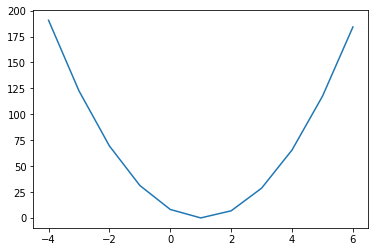

In [0]:
#그래프로 나타내기.
cs = []
for v in [-4,-3,-2,-1,0,1,2,3,4,5,6]:
  c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:v})
  cs.append(c)
plt.plot([-4,-3,-2,-1,0,1,2,3,4,5,6], cs)

0.009212394
501
1.0330330330330337


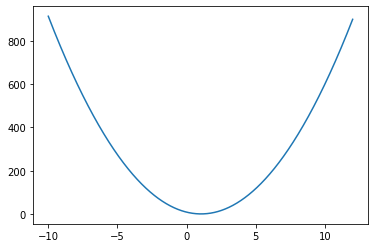

In [0]:
#w값이 정수가 아닐 경우.

cs = []
fromto = np.linspace(-10, 12, 1000)
for v in fromto:
  c = sess.run(cost, feed_dict={x:x_data, y:y_data, w:v})
  cs.append(c)
plt.plot(fromto, cs)

print(np.array(cs).min())
print(np.array(cs).argmin()) #최소값일 때의 w의 인덱스 값.
print(fromto[np.array(cs).argmin()]) #w값

#정수만 사용했을 때보다 최솟값이 낮아짐. 

In [0]:
#경사하강법 이용.

learning_rate = 0.1 #학습률

w = tf.Variable(2.0) #기울기의 초깃값
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
hypothesis = w*x
cost = tf.reduce_mean(tf.square(hypothesis-y))
cost = tf.reduce_mean(tf.square(hypothesis-y))

gradient = tf.reduce_mean((w*x -y) * x)
#w = w - learning rate * gradient
descent = w - learning_rate * gradient #cost가 작아지도록 w 업데이트
update = w.assign(descent) #assign을 사용하지 않으면 새로운 w가 지속적으로 생성 따라서 assign을 이용해야 업데이트 가능.


In [0]:
init = tf.global_variables_initializer()
sess.run(init)

sess.run(update, feed_dict={x:x_data, y:y_data})
c, w_ = sess.run([cost,w], feed_dict = {x:x_data, y: y_data})
print(c, w_) #첫번째 업데이트.

0.43742207 1.2825


In [0]:
sess.run(update, feed_dict={x:x_data, y:y_data})
c, w_ = sess.run([cost,w], feed_dict = {x:x_data, y: y_data})
print(c, w_) #첫번째 업데이트.

sess.run(update, feed_dict={x:x_data, y:y_data})
c, w_ = sess.run([cost,w], feed_dict = {x:x_data, y: y_data})
print(c, w_) #첫번째 업데이트.

sess.run(update, feed_dict={x:x_data, y:y_data})
c, w_ = sess.run([cost,w], feed_dict = {x:x_data, y: y_data})
print(c, w_) #cost 값이 점점 작아짐.

0.03522947 1.103125
0.01009246 1.0582812
0.008521404 1.0470703


In [0]:
#반복문 이용
sess.run(tf.global_variables_initializer()) # w 처음부터 다시 시작.

for i in range(0,10) : 
  sess.run(update, feed_dict={x:x_data, y:y_data})
  c, w_ = sess.run([cost, w], feed_dict = {x:x_data, y:y_data})
  print(i, c, w_)

0 0.43742207 1.2825
1 0.03522947 1.103125
2 0.01009246 1.0582812
3 0.008521404 1.0470703
4 0.0084232045 1.0442675
5 0.008417085 1.0435668
6 0.008416693 1.0433917
7 0.008416677 1.043348
8 0.008416675 1.043337
9 0.008416668 1.0433342


In [0]:
#반복문 이용
sess.run(tf.global_variables_initializer()) # w 처음부터 다시 시작.

for i in range(0,20) : 
  sess.run(update, feed_dict={x:x_data, y:y_data})
  c, w_ = sess.run([cost, w], feed_dict = {x:x_data, y:y_data})
  print(i, c, w_) #12번 하고 나면 더이상 차이가 없음 -> 학습을 많이 해도 cost 값이 계속 낮아지는 것은 아님.

0 0.43742207 1.2825
1 0.03522947 1.103125
2 0.01009246 1.0582812
3 0.008521404 1.0470703
4 0.0084232045 1.0442675
5 0.008417085 1.0435668
6 0.008416693 1.0433917
7 0.008416677 1.043348
8 0.008416675 1.043337
9 0.008416668 1.0433342
10 0.008416667 1.0433335
11 0.008416659 1.0433334
12 0.008416668 1.0433333
13 0.008416668 1.0433333
14 0.008416668 1.0433333
15 0.008416668 1.0433333
16 0.008416668 1.0433333
17 0.008416668 1.0433333
18 0.008416668 1.0433333
19 0.008416668 1.0433333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Legend does not sup

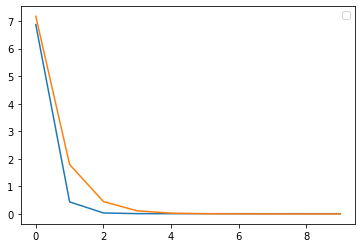

In [0]:
#기울기인 gradient가 어떻게 변하는지 알아보자.
sess.run(tf.global_variables_initializer())
cs = []
gs = []

for i in range(0,10):
  _, c, g = sess.run([update , cost, gradient], feed_dict= {x:x_data, y:  y_data}) #run함수를 한번만 사용할 수 있게 구현.
  cs.append(c) #cost
  gs.append(g) #gradient

plt.plot(cs)
plt.plot(gs)
plt.legend("cost", "gradient")

In [0]:
#중단 조건을 넣어 특정 기준 이상되면 학습 그만되도록 하기.
sess.run(tf.global_variables_initializer())

oldc = 1000
for i in range(0,1000):
  _, c, g = sess.run([update , cost, gradient], feed_dict= {x:x_data, y:  y_data})
  print(i, c)
  if oldc - c < 0.00001 : break
  oldc = c
  

0 6.8725004
1 0.43742207
2 0.03522947
3 0.01009246
4 0.008521404
5 0.0084232045
6 0.008417085


1.0433917


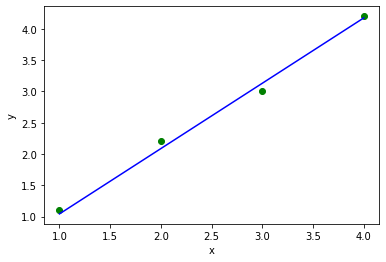

In [0]:
#경사하강법에 의해 학습이 얼마나 잘되었는지 시각화.
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_data, y_data, "go") #초록색 동그라미

w_ = sess.run(w)
print(w_)
plt.plot(x_data, np.array(x_data) * w_, "b") #y축에 예측값을 넣어 파란색 직선으로 출력.

In [0]:
#경사하강법은 w의 초기값에 따라 결과까지 가는데의 속도가 다를 수 있음.
#tensorflow는 다양한 최적화 알고리즘을 지원.
#경사하강법을 직접 구현하는 것이 아니고 학습률과 cost만 정의해서 계산 가능.
x_data = [1.0,2,3,4]
y_data = [1.1, 2.2, 3, 4.2]

w = tf.Variable(0.0)

hypothesis = w * x_data
cost = tf.sqrt(tf.reduce_mean(tf.square(hypothesis - y_data)))

learning_rate = 0.1
update = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #cost와 learning rate만 설정.



1.1761026 0.37500086


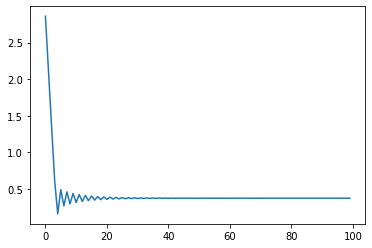

In [0]:
sess.run(tf.global_variables_initializer())
cs = []
for step in range(100):
  c, _ = sess.run([cost, update])
  cs.append(c)
w_ = sess.run(w)
print(w_, c)
plt.plot(cs) #tensorflow는 도함수를 계산할 때 미분에서 발생하는 여러 요인에 의해 cost가 왔다갔다 할 수 있음.

1.1420243 0.41751075


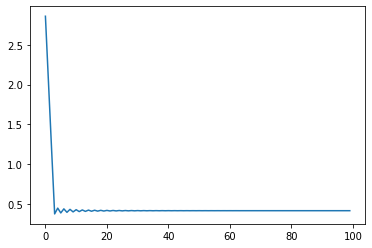

In [0]:
#학습 파라미터가 추가 되어도 코드를 수정하지 않아도 괜찮음.
x_data = [1.0,2,3,4]
y_data = [1.1, 2.2, 3, 4.2]

w = tf.Variable(0.0)
b = tf.Variable(0.0)
hypothesis = w * x_data + b #학습 모델 변경.

cost = tf.sqrt(tf.reduce_mean(tf.square(hypothesis - y_data)))

learning_rate = 0.1
update = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
sess.run(tf.global_variables_initializer())
cs = []
for step in range(100):
  c, _ = sess.run([cost, update])
  cs.append(c)
w_ = sess.run(w)
print(w_, c)
plt.plot(cs)
#학습데이터가 너무 커서 학습이 제대로 되지 않는 경우에는 학습 데이터를 scailing 시키기.
                                                                   